In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('O3.csv')
data.head()

,mjd,flux,fluxerr
0,56988.5,-0.335473,0.033547
1,56989.5,0.060437,0.006044
2,56990.5,3.640928,0.364093
3,57014.5,8.684235,0.868424
4,57015.5,7.877713,0.787771


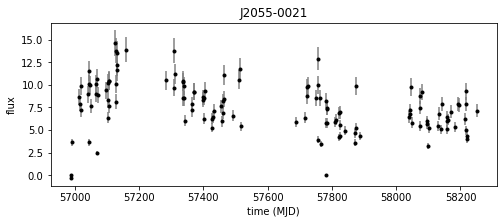

In [23]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.errorbar(data.mjd, data.flux, data.fluxerr,
            fmt='.k', ecolor='gray', capsize=0)
ax.set(xlabel='time (MJD)',
       ylabel='flux',
       title='J2055-0021')
#ax.invert_yaxis()

fig.savefig('1111.pdf');

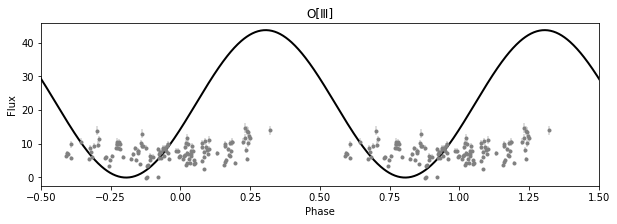

In [29]:
from astropy.timeseries import LombScargle
ls = LombScargle(data.mjd, data.flux, data.fluxerr)

phase = (data.mjd /388) % 1
fig, ax = plt.subplots(figsize=(10, 3))

phase_model = np.linspace(-0.5, 2, 1000)
best_frequency = 1/388
mag_model = ls.model(phase_model / best_frequency, best_frequency)

for offset in [-1, 0, 1]:
    ax.errorbar(phase + offset, data.flux, data.fluxerr, fmt='.',
                color='gray', ecolor='lightgray', capsize=0);
ax.plot(phase_model-0.1,3*mag_model, '-k', lw=2)
ax.set(xlim=(-0.5, 1.5),
       xlabel='Phase',
       ylabel='Flux',
      title='O[Ⅲ]')
#ax.invert_yaxis()

fig.savefig('O3-NEW.pdf',bbox_inches='tight')

# 